In [209]:
import pickle
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import networkx as nx

df = pd.read_pickle('txn_data_frame/txn_dataframe.pickle')

sender = df['Sender Address'].tolist()
receiver = df['Receiver Address'].tolist()

total = sender + receiver

new_df = df.groupby(['Receiver Address'])['Sender Address'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
cuenta = []
differ = []
counter = 0
for i in range(len(sender)):
  if sender[i] == receiver[i]:
    cuenta.append(sender[i])
#print(cuenta[0],cuenta.count(cuenta[0]), len(cuenta))

for i in range(len(cuenta)):
  if cuenta[i] != 'C7RYOGEWDT7HZM3HKPSMU7QGWTRWR3EPOQTJ2OHXGYLARD3X62DNWELS34':
    #print(cuenta[i])
    differ.append(cuenta[i])





<Figure size 2000x1000 with 0 Axes>

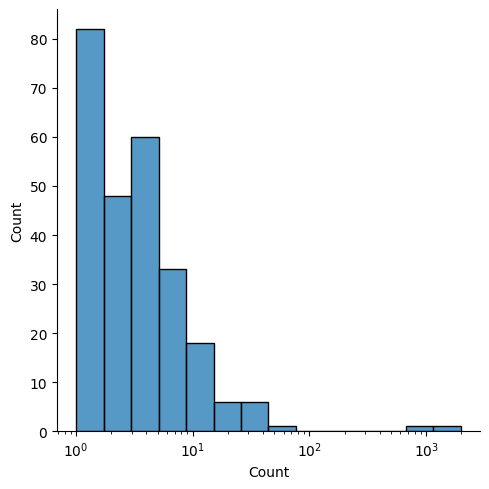

<AxesSubplot: xlabel='Sender Address', ylabel='Count'>

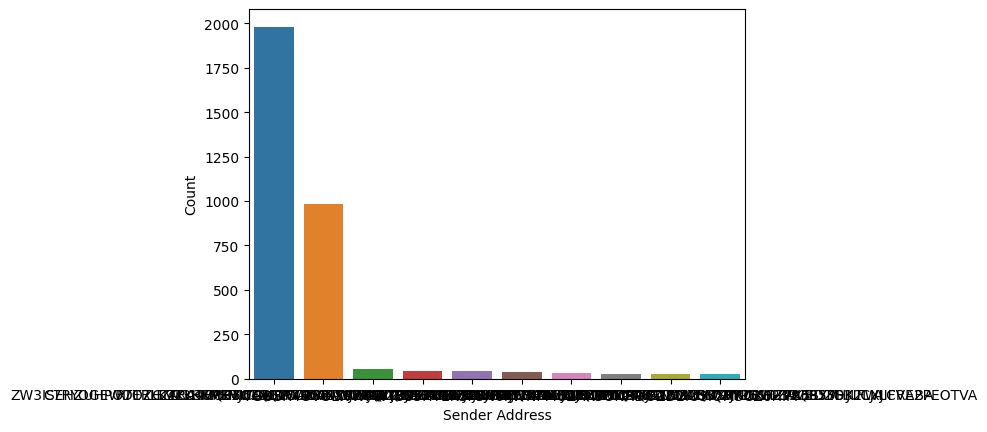

In [218]:
#Grafico de frecuencia para senders

senders = df[['Sender Address', 'Transaction Type']]
senders

new_df = senders.groupby(['Sender Address'])['Sender Address'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
#new_df

plt.figure(figsize=(20,10))
sb.displot(new_df, x = 'Count', log_scale=True)
plt.show()

f_new_df = new_df[:10]
f_new_df

sb.barplot(data = f_new_df, x='Sender Address', y = 'Count')





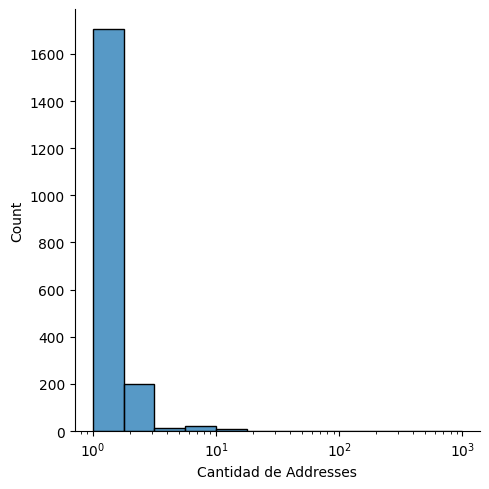

<AxesSubplot: xlabel='Receiver Address', ylabel='Count'>

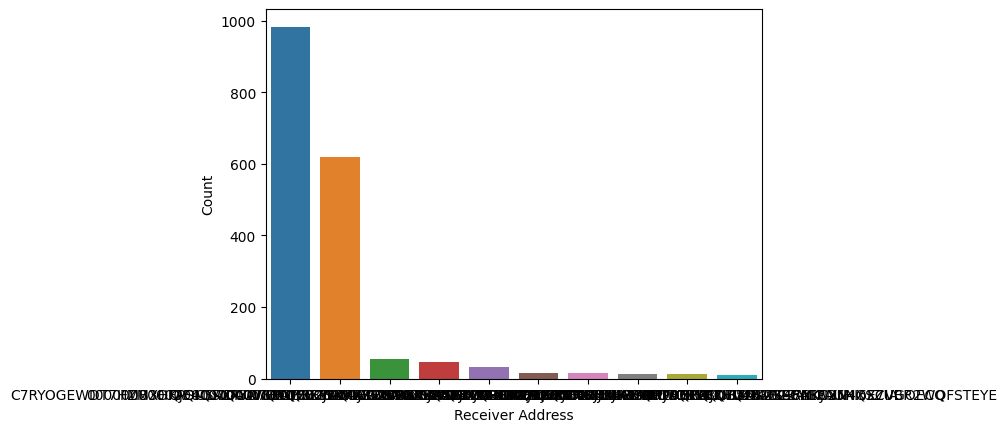

In [227]:
#Grafico de frecuencia para receivers


receivers = df[['Receiver Address', 'Transaction Type']]
receivers

new_df2 = receivers.groupby(['Receiver Address'])['Receiver Address'].count().reset_index(
  name='Count').sort_values(['Count'], ascending=False)
new_df2

sb.displot(new_df2, x = 'Count', log_scale = True)
plt.xlabel('Cantidad de Addresses')
#plt.ylim(0, 600)
plt.show()

f_new_df2 = new_df2[:10]
f_new_df2
sb.barplot(data = f_new_df2, x='Receiver Address', y = 'Count')

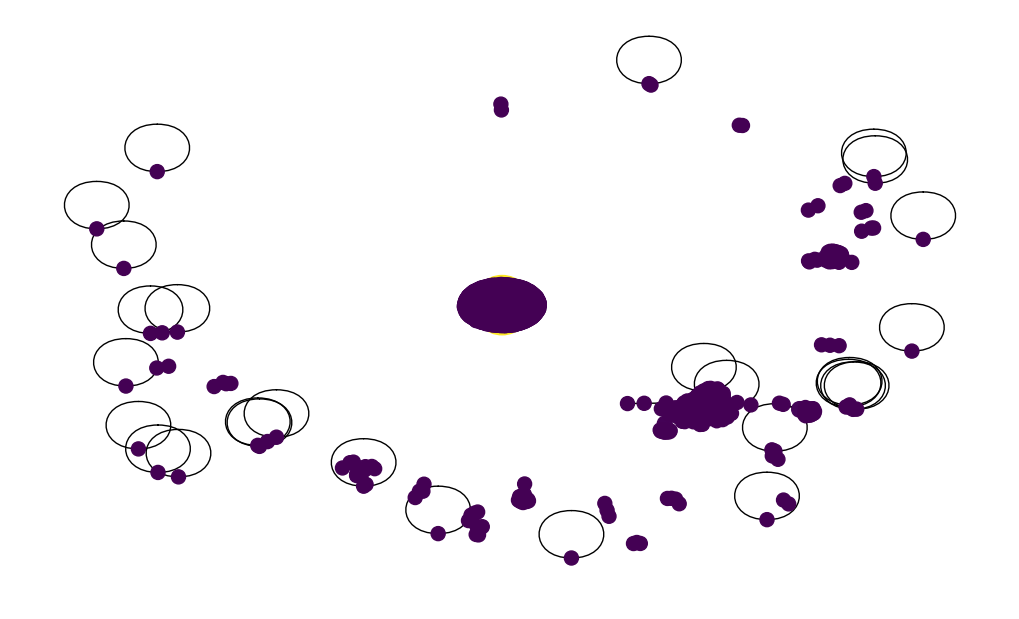

In [229]:
G = nx.Graph()

df_new = df[3000:4000]
G = nx.from_pandas_edgelist(df,'Sender Address', 'Receiver Address')

plt.figure(figsize=(10, 6))
#nx.draw_networkx(G, with_labels=False)


node_color = [float(G.degree(v)) for v in G]

nx.draw(
    G,
    node_size = [float(G.degree(v)) + 100 for v in G],
    node_color=node_color,
    with_labels=False,
)

# # nx.draw_shell(G)


In [256]:
filtered = df[df['Sender Address'] != 'ZW3ISEHZUHPO7OZGMKLKIIMKVICOUDRCERI454I3DB2BH52HGLSO67W754']
filtered

H = nx.from_pandas_edgelist(filtered,'Sender Address', 'Receiver Address')

,Sender Address,Receiver Address,Transaction Type
4,C7RYOGEWDT7HZM3HKPSMU7QGWTRWR3EPOQTJ2OHXGYLARD...,C7RYOGEWDT7HZM3HKPSMU7QGWTRWR3EPOQTJ2OHXGYLARD...,axfer
5,C7RYOGEWDT7HZM3HKPSMU7QGWTRWR3EPOQTJ2OHXGYLARD...,C7RYOGEWDT7HZM3HKPSMU7QGWTRWR3EPOQTJ2OHXGYLARD...,axfer
6,5W3QB7A7BFX2MD7XRMD3FLYEBS4AMOVFHRL5QAOP4QQC22...,IV4VQ5DW3JVUMRBXBBOAKASTAGOUXFRZPPHIC2HHSW2G4Q...,axfer
8,C7RYOGEWDT7HZM3HKPSMU7QGWTRWR3EPOQTJ2OHXGYLARD...,C7RYOGEWDT7HZM3HKPSMU7QGWTRWR3EPOQTJ2OHXGYLARD...,axfer
11,C7RYOGEWDT7HZM3HKPSMU7QGWTRWR3EPOQTJ2OHXGYLARD...,C7RYOGEWDT7HZM3HKPSMU7QGWTRWR3EPOQTJ2OHXGYLARD...,axfer
...,...,...,...
4184,RTMZKBTMQ66WM76O7HHH3NXUPVTLTYJH7GEMPO4DUZ54UI...,ZDJDOZNBW3FOZO75M62FGXIROGZTI4VPD63INU7YAB5VLF...,pay
4185,ZDJDOZNBW3FOZO75M62FGXIROGZTI4VPD63INU7YAB5VLF...,0000000000000000000000000000000000000000000000...,appl
4186,RTMZKBTMQ66WM76O7HHH3NXUPVTLTYJH7GEMPO4DUZ54UI...,ZDJDOZNBW3FOZO75M62FGXIROGZTI4VPD63INU7YAB5VLF...,axfer
4187,RTMZKBTMQ66WM76O7HHH3NXUPVTLTYJH7GEMPO4DUZ54UI...,ZDJDOZNBW3FOZO75M62FGXIROGZTI4VPD63INU7YAB5VLF...,axfer
